# Quantitative exploratory data analysis

In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.

In [1]:
from IPython.display import HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction to summary statistics: The sample mean and median

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Introduction_to_summary_statistics_The_sample_mean_and_median.mp4" type="video/mp4">
</video>

## Mean

>\begin{equation*}
\ mean = \overline{x} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} x_i
\end{equation*}

## Outliers 
> Data points whose value is far greater or less than most of the rest of the data

## The median
> The middle value of a data set

### Means and medians
Which one of the following statements is true about means and medians?

>Possible Answers
- [ ] An outlier can significantly affect the value of both the mean and the median.
- [x] An outlier can significantly affect the value of the mean, but not the median.
- [ ] Means and medians are in general both robust to single outliers.
- [ ] The mean and median are equal if there is an odd number of data points.

### Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using `np.mean()`

In [3]:
from sklearn.datasets import load_iris
# save "bunch" object containing iris dataset and iits attributes
iris = load_iris()

dict_iris = {0:'setosa', 1:'versicolor',2:'virginica'}

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['CLASS'] = iris.target
iris_df['species'] = iris_df.apply (lambda row: dict_iris.get(row.CLASS,'NOT FOUND'), axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
setosa_petal_length     = iris_df[iris_df.species=='setosa']['petal length (cm)'].values
versicolor_petal_length = iris_df[iris_df.species=='versicolor']['petal length (cm)'].values
virginica_petal_length  = iris_df[iris_df.species=='virginica']['petal length (cm)'].values

setosa_petal_width     = iris_df[iris_df.species=='setosa']['petal width (cm)'].values
versicolor_petal_width = iris_df[iris_df.species=='versicolor']['petal width (cm)'].values
virginica_petal_width  = iris_df[iris_df.species=='virginica']['petal width (cm)'].values

In [5]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('Median petal length (cm) Iris versicolor:', mean_length_vers, 'cm')

Median petal length (cm) Iris versicolor: 4.26 cm


## Percentiles, outliers, and box plots

In [6]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-Percentiles_outliers_and_box_plots.mp4" type="video/mp4">
</video>

> The median is a special name for the 50th percentile, that means, 50% of the data are less than the median.

> Simirlaly the 25th percentile is the value of the data point that is greater than 25% of the sorted data.

When the number of data are very large and bee swarm plots are to cluttered, [box plots][1] are a great alternative.

![][boxplot]

[1]: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

[boxplot]: _Docs/composition_of_a_boxplot.png "Different parts of a boxplot"

### Computing percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

In [7]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles) 

# Print the result
print (ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as `ptiles_vers` and `percentiles`.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the `percentiles` array accordingly - in this case, dividing it by 100.

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

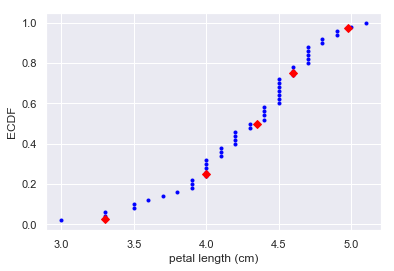

In [9]:
sns.set()

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', color='blue', linestyle='none')

# Plot the ECDF
_ = plt.plot(ptiles_vers, percentiles/100, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

### Box-and-whisker plot
**Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine**. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, `iris_df`, which contains the petal length data, in your namespace. 

For your reference, the code used to produce the box plot in the video is provided below:
``` Python
_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)

_ = plt.xlabel('region')

_ = plt.ylabel('percent of vote for Obama')
```

In the IPython Shell, you can use `sns.boxplot`? or `help(sns.boxplot)` for more details on how to make box plots using seaborn.

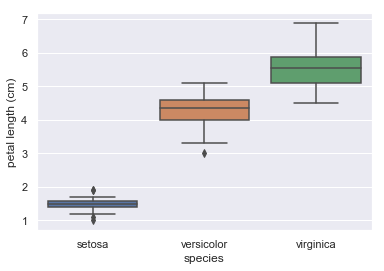

In [10]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species',y='petal length (cm)',data=iris_df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

## Variance and standard deviation

In [11]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-Variance_and_standard_deviation.mp4" type="video/mp4">
</video>

## [Variance][1]
- The mean squared distance of the data from their mean
- Informally, a measure of the spread of data

>\begin{equation*}
\ variance = S^2 = \sigma^2 = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (x_i - \overline{x})^2
\end{equation*}

## [Standard Deviation][2]

- In statistics, the standard deviation ([SD][3], also represented by the lower case Greek letter sigma σ or the Latin letter S) is a measure that is used to quantify the amount of variation or dispersion of a set of data values.

>\begin{equation*}
\ variance = S = \sigma =  \sqrt{\frac{1}{n} \displaystyle\sum_{i=1}^{n} (x_i - \overline{x})^2}
\end{equation*}


[1]: https://www.vitutor.com/estadistica/descriptiva/a_15.html
[2]: https://es.khanacademy.org/math/probability/data-distributions-a1/summarizing-spread-distributions/v/range-variance-and-standard-deviation-as-measures-of-dispersion
[3]: https://en.wikipedia.org/wiki/Standard_deviation

## Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use `np.var()` to compute it.

In [12]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit,variance_np)

0.21640000000000004 0.21640000000000004


### The standard deviation and the variance
As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using `np.std()` and comparing it to what you get by computing the variance with `np.var()` and then computing the square root.

In [13]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Covariance and Pearson correlation coefficient

In [14]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/04-Covariance_and_Pearson_correlation_coefficient.mp4" type="video/mp4">
</video>

## [Covariance][1]
- A measure of how two quantities vary together

>\begin{equation*}
\ COV(x,y) = {\frac{1}{n} \displaystyle\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} = \sigma_{xy}
\end{equation*}

![][covariance]

## [Pearson correlation coefficient][2]
- Also a measure of how two quantities vary together.
- covariance assumes the units from the product of the units of the two variables.
- [correlation is dimensionless][3]. It is a unit-free measure of the relationship between variables. This is because we divide the value of covariance by the product of standard deviations which have the same units.
- Another difference between [covariance and correlation][4] is the range of values that they can assume. While correlation coefficients lie between -1 and +1, covariance can take any value between -∞ and +∞.

>\begin{equation*}
\ Pearson Correlation = \frac{variability-due-to-codependence}{independent-variability} = \frac{covariance}{(std-of-x)(std-of-y)}
\end{equation*}

>\begin{equation*}
\rho_{xy} = {\frac{\sigma_{xy}}{\sigma_x \sigma_y}} 
\end{equation*}

[covariance]: _Docs/covariance.PNG
[1]: https://en.wikipedia.org/wiki/Covariance
[2]: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
[3]: https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22
[4]: https://en.wikipedia.org/wiki/Covariance_and_correlation

### Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a **scatter plot** of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:
``` Python
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

_ = plt.xlabel('total votes (thousands)')

_ = plt.ylabel('percent of vote for Obama')
```

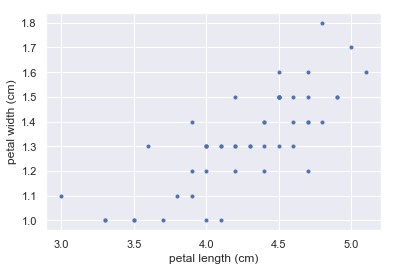

In [15]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

### Variance and covariance by looking
Consider four scatter plots of x-y data, appearing to the right. Which has, respectively,

the highest variance in the variable x,
the highest covariance,
negative covariance?

![][Variance_and_covariance]

> Possible Answers
- [ ] a, c, b
- [ ] d, c, a
- [x] d, c, b
- [ ] d, d, b

[Variance_and_covariance]: _Docs/Variance_and_covariance.png

### Computing the covariance
The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data `x` and `y`, `np.cov(x, y)` returns a 2D array where entries `[0,1]` and `[1,0]` are the covariances. Entry `[0,0]` is the variance of the data in `x`, and entry `[1,1]` is the variance of the data in `y`. This 2D output array is called the **[covariance matrix][1]**, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

[1]: https://datascienceplus.com/understanding-the-covariance-matrix/

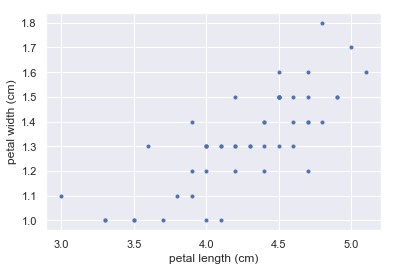

In [16]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

In [17]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632651


### Computing the Pearson correlation coefficient
As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries `[0,0]` and `[1,1]` are necessarily equal to 1 (can you think about why?), and the value we are after is entry `[0,1]`.

In this exercise, you will write a function, `pearson_r(x, y)` that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

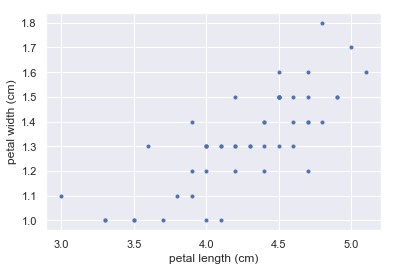

In [18]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

0.7866680885228167
